In [ ]:
pip install kagglehub pandas matplotlib seaborn scikit-learn statsmodels


In [ ]:
import kagglehub
import pandas as pd

# Define dataset path
dataset_name = "imdevskp/corona-virus-report"
file_path = "covid_19_clean_complete.csv"  # Adjust based on the dataset structure

# Load dataset
df = kagglehub.load_dataset(kagglehub.KaggleDatasetAdapter.PANDAS, dataset_name, file_path)

# Display first few records
print("First 5 records:")
print(df.head())


<ipython-input-3-7c708a59c10a>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(kagglehub.KaggleDatasetAdapter.PANDAS, dataset_name, file_path)


First 5 records:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [ ]:
# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Fill missing values (example: filling NaN with 0)
df.fillna(0, inplace=True)

# Convert date column (if applicable)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Drop unnecessary columns (adjust based on dataset)
df.drop(columns=['Province/State'], inplace=True, errors='ignore')

# Display dataset info
print("\nDataset Info:")
print(df.info())



Missing values per column:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Lat             49068 non-null  float64       
 2   Long            49068 non-null  float64       
 3   Date            49068 non-null  datetime64[ns]
 4   Confirmed       49068 non-null  int64         
 5   Deaths          49068 non-null  int64         
 6   Recovered       49068 non-null  int64         
 7   Active          49068 non-null  int64         
 8   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](

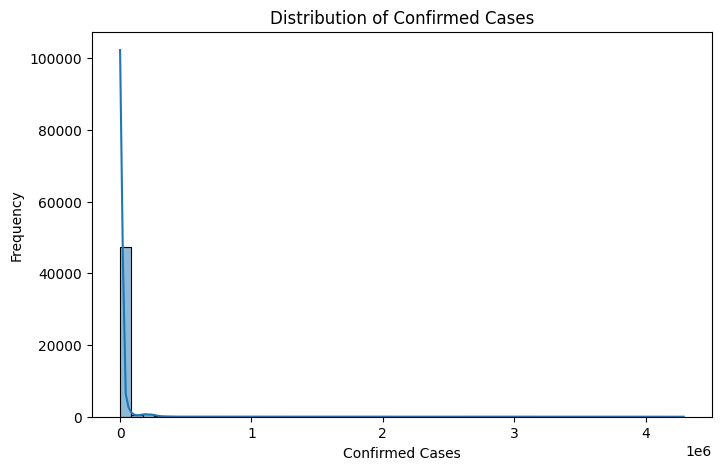

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Confirmed'], bins=50, kde=True)
plt.title("Distribution of Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()


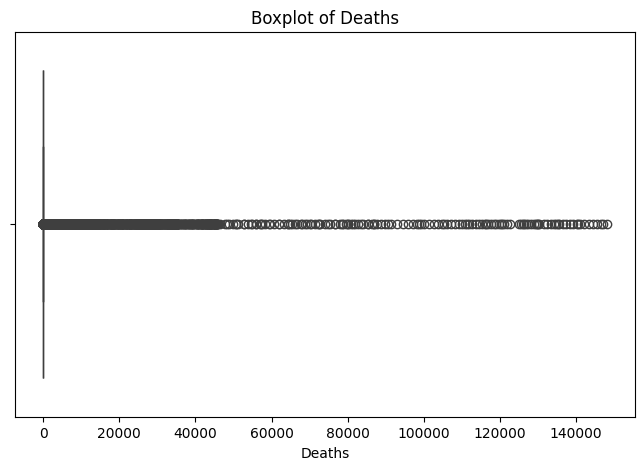

In [ ]:
#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Deaths'])
plt.title("Boxplot of Deaths")
plt.show()


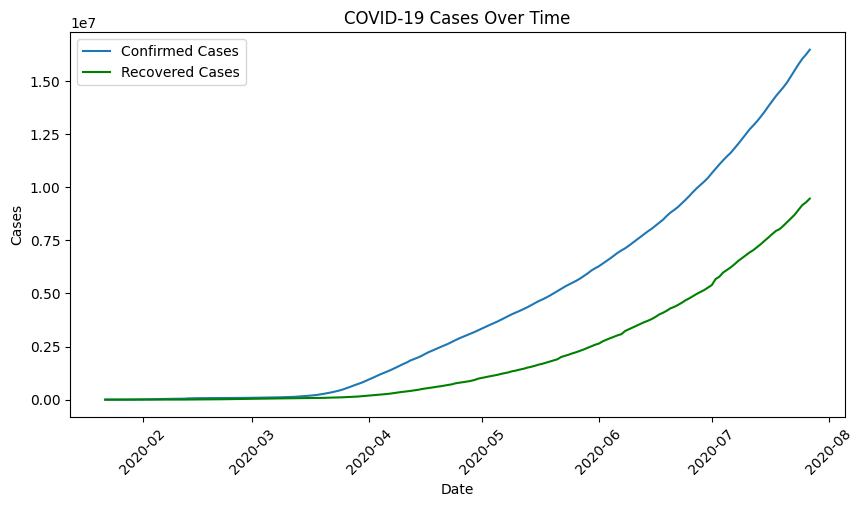

In [ ]:
#time series plot
if 'Date' in df.columns:
    df_grouped = df.groupby('Date').sum()
    plt.figure(figsize=(10, 5))
    plt.plot(df_grouped.index, df_grouped['Confirmed'], label='Confirmed Cases')
    plt.plot(df_grouped.index, df_grouped['Recovered'], label='Recovered Cases', color='green')
    plt.legend()
    plt.xlabel("Date")
    plt.ylabel("Cases")
    plt.title("COVID-19 Cases Over Time")
    plt.xticks(rotation=45)
    plt.show()


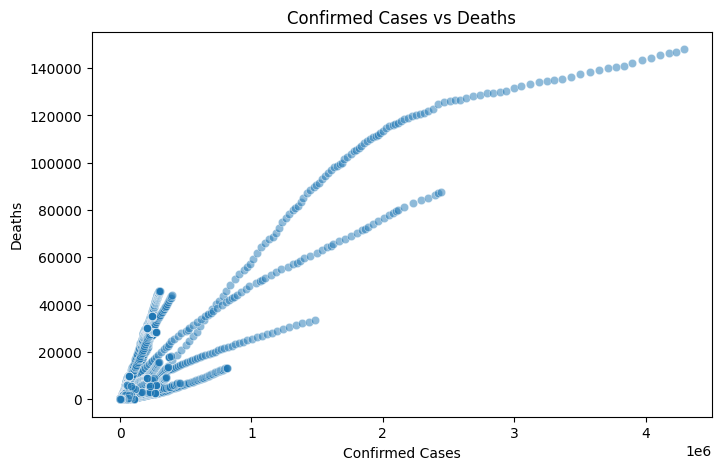

In [ ]:
#scattered plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Confirmed'], y=df['Deaths'], alpha=0.5)
plt.title("Confirmed Cases vs Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()


In [ ]:
#Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())



Descriptive Statistics:
                 Lat          Long                 Date     Confirmed  \
count  49068.000000  49068.000000                49068  4.906800e+04   
mean      21.433730     23.528236  2020-04-24 12:00:00  1.688490e+04   
min      -51.796300   -135.000000  2020-01-22 00:00:00  0.000000e+00   
25%        7.873054    -15.310100  2020-03-08 18:00:00  4.000000e+00   
50%       23.634500     21.745300  2020-04-24 12:00:00  1.680000e+02   
75%       41.204380     80.771797  2020-06-10 06:00:00  1.518250e+03   
max       71.706900    178.065000  2020-07-27 00:00:00  4.290259e+06   
std       24.950320     70.442740                  NaN  1.273002e+05   

              Deaths     Recovered        Active  
count   49068.000000  4.906800e+04  4.906800e+04  
mean      884.179160  7.915713e+03  8.085012e+03  
min         0.000000  0.000000e+00 -1.400000e+01  
25%         0.000000  0.000000e+00  0.000000e+00  
50%         2.000000  2.900000e+01  2.600000e+01  
75%        30.00000

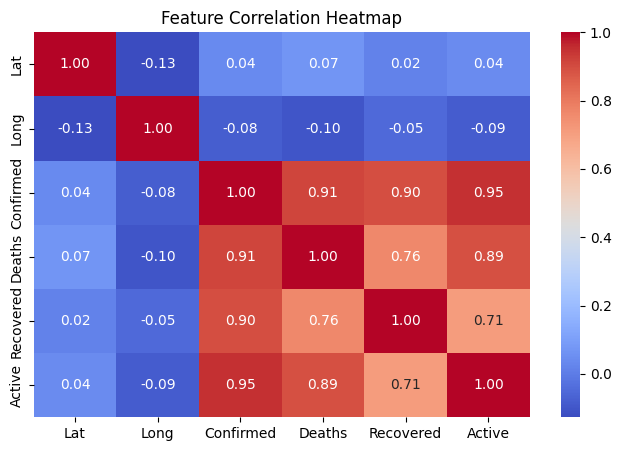

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix and plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#Regression Model (Predict Deaths based on Cases)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
X = df[['Confirmed']]  # Feature
y = df['Deaths']       # Target

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\nRegression Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Regression Model Evaluation:
MAE: 558.4178417776695
MSE: 6547979.1219920665
R² Score: 0.8573150334231378


In [ ]:
#Classification Model (Predict High-Risk Regions)
from sklearn.ensemble import RandomForestClassifier

# Create a binary target variable (1 if high risk, 0 otherwise)
threshold = df['Confirmed'].quantile(0.75)  # Top 25% cases
df['High_Risk'] = (df['Confirmed'] > threshold).astype(int)

# Select features and target
X = df[['Confirmed', 'Deaths', 'Recovered']]
y = df['High_Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("\nClassification Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Classification Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7343
           1       1.00      1.00      1.00      2471

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che


Time Series Forecast (Next 10 Days):
2020-07-28    1.672969e+07
2020-07-29    1.699285e+07
2020-07-30    1.726257e+07
2020-07-31    1.751346e+07
2020-08-01    1.775230e+07
2020-08-02    1.799052e+07
2020-08-03    1.823450e+07
2020-08-04    1.848848e+07
2020-08-05    1.874487e+07
2020-08-06    1.899697e+07
Freq: D, Name: predicted_mean, dtype: float64


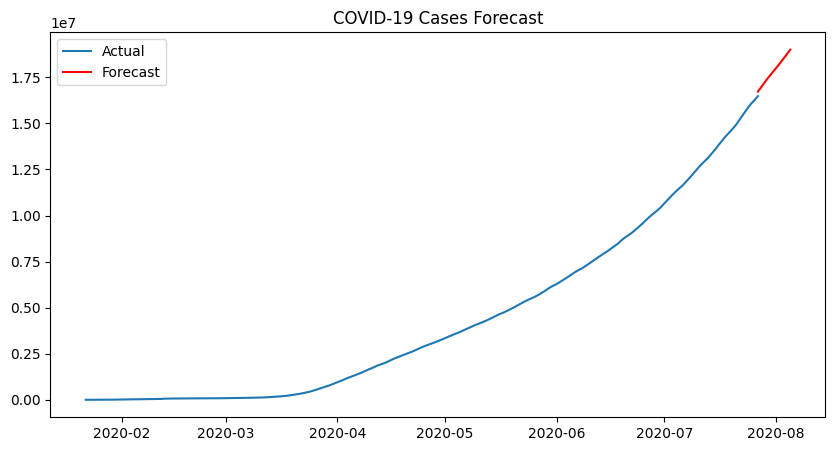

In [ ]:
#Time Series Forecasting (Predict Future Cases)
from statsmodels.tsa.arima.model import ARIMA

# Ensure time series data
if 'Date' in df.columns:
    df_grouped = df.groupby('Date').sum()

    # Fit ARIMA model
    model = ARIMA(df_grouped['Confirmed'], order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast next 10 days
    forecast = model_fit.forecast(steps=10)

    print("\nTime Series Forecast (Next 10 Days):")
    print(forecast)

    # Plot forecast
    plt.figure(figsize=(10, 5))
    plt.plot(df_grouped.index, df_grouped['Confirmed'], label="Actual")
    plt.plot(pd.date_range(df_grouped.index[-1], periods=10, freq='D'), forecast, label="Forecast", color='red')
    plt.legend()
    plt.title("COVID-19 Cases Forecast")
    plt.show()


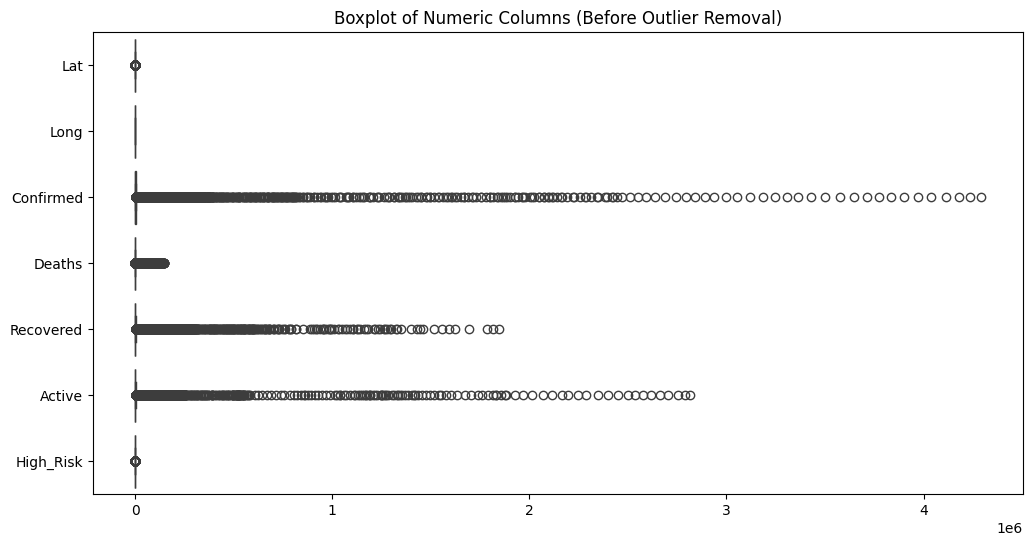

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title("Boxplot of Numeric Columns (Before Outlier Removal)")
plt.show()


In [ ]:
# Make a copy of the original DataFrame
df_clean = df.copy()

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to numeric columns only
numeric_cols = df_clean.select_dtypes(include='number').columns
df_clean = remove_outliers_iqr(df_clean, numeric_cols)


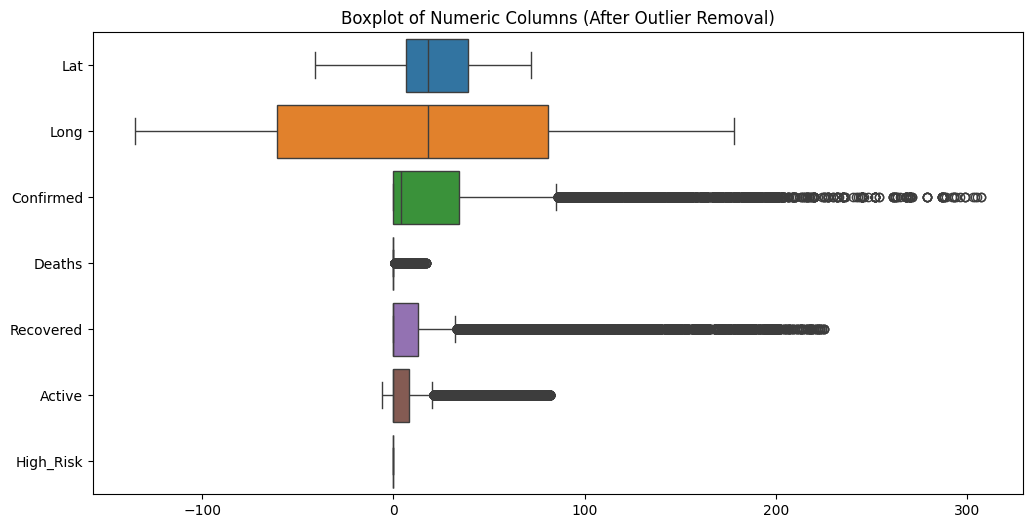

In [ ]:
# Box plot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[numeric_cols], orient='h')
plt.title("Boxplot of Numeric Columns (After Outlier Removal)")
plt.show()


In [ ]:
from scipy.stats import norm
import numpy as np

# Sample groups
europe = df[df['WHO Region'] == 'Europe']['Deaths']
africa = df[df['WHO Region'] == 'Africa']['Deaths']

# Means and standard deviations
mean1, std1, n1 = europe.mean(), europe.std(), len(europe)
mean2, std2, n2 = africa.mean(), africa.std(), len(africa)

# Standard error
se = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Z-score and p-value
z_score = (mean1 - mean2) / se
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f"\n🔹 Z-Test\nZ-score: {z_score:.3f}, p-value: {p_value:.5f}")



🔹 Z-Test
Z-score: 28.140, p-value: 0.00000


In [ ]:
from scipy.stats import ttest_ind

# Pick two dates
group1 = df[df['Date'] == '2020-04-01']['Confirmed']
group2 = df[df['Date'] == '2020-05-01']['Confirmed']

# Independent t-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

print(f"\n🔹 T-Test\nT-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")



🔹 T-Test
T-statistic: -1.956, p-value: 0.05146


In [ ]:
from scipy.stats import f_oneway

# Get list of Deaths per region
grouped_deaths = [group['Deaths'] for _, group in df.groupby('WHO Region')]

# Run ANOVA
anova_stat, anova_p = f_oneway(*grouped_deaths)

print(f"\n🔹 ANOVA\nF-statistic: {anova_stat:.3f}, p-value: {anova_p:.5f}")



🔹 ANOVA
F-statistic: 162.180, p-value: 0.00000


In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Set seed for reproducibility
np.random.seed(0)

# Simulate two identical groups (same mean)
group_A = np.random.normal(loc=50, scale=10, size=100)
group_B = np.random.normal(loc=50, scale=10, size=100)

# Perform t-test
t_stat, p_value = ttest_ind(group_A, group_B)

print("\n🔹 Type I Error Simulation (No true difference)")
print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.5f}")

if p_value < 0.05:
    print("❌ Type I Error: Rejected null when it's actually true")
else:
    print("✅ Correct: Failed to reject null (as expected)")



🔹 Type I Error Simulation (No true difference)
T-statistic: -0.153, p-value: 0.87859
✅ Correct: Failed to reject null (as expected)


In [ ]:
# Simulate small difference between means
group_C = np.random.normal(loc=50, scale=10, size=30)
group_D = np.random.normal(loc=52, scale=10, size=30)

# Perform t-test
t_stat2, p_value2 = ttest_ind(group_C, group_D)

print("\n🔹 Type II Error Simulation (Real difference exists)")
print(f"T-statistic: {t_stat2:.3f}, p-value: {p_value2:.5f}")

if p_value2 >= 0.05:
    print("❌ Type II Error: Failed to detect a real difference")
else:
    print("✅ Correct: Detected significant difference")



🔹 Type II Error Simulation (Real difference exists)
T-statistic: 0.070, p-value: 0.94461
❌ Type II Error: Failed to detect a real difference


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


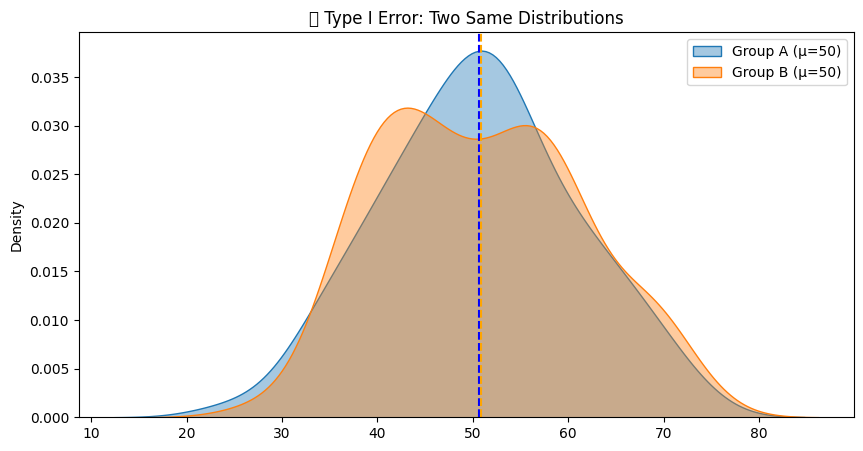

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


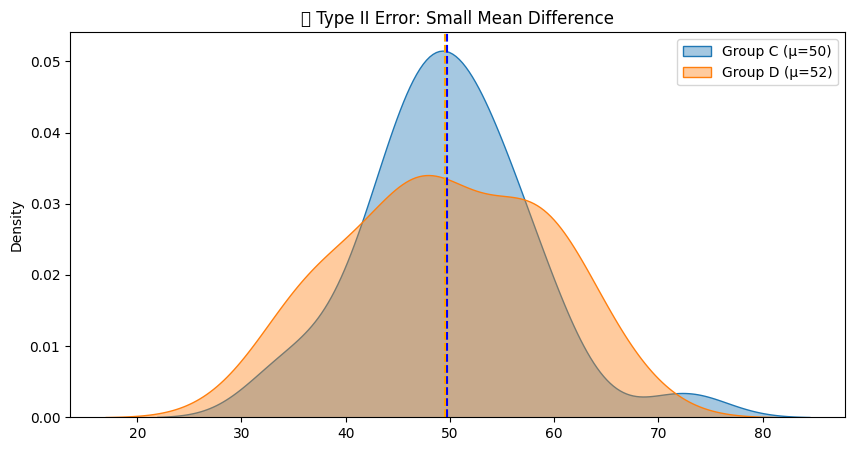

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots
plt.figure(figsize=(10, 5))

sns.kdeplot(group_A, label='Group A (μ=50)', fill=True, alpha=0.4)
sns.kdeplot(group_B, label='Group B (μ=50)', fill=True, alpha=0.4)
plt.axvline(np.mean(group_A), color='blue', linestyle='--')
plt.axvline(np.mean(group_B), color='orange', linestyle='--')
plt.title("🔹 Type I Error: Two Same Distributions")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(group_C, label='Group C (μ=50)', fill=True, alpha=0.4)
sns.kdeplot(group_D, label='Group D (μ=52)', fill=True, alpha=0.4)
plt.axvline(np.mean(group_C), color='blue', linestyle='--')
plt.axvline(np.mean(group_D), color='orange', linestyle='--')
plt.title("🔸 Type II Error: Small Mean Difference")
plt.legend()
plt.show()
